## Importing Libraries

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading word development indicators dataset

In [225]:
gdp_df = pd.read_csv('/workspaces/Portfolio_Project/Dataset/word_develop_ind.csv')
gdp_df.head(3)

,Country Name,Series Name,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,GDP (current US$),12416152732.0567,15856668555.8336,17805098206.3141,19907329777.5872,20146416757.5987,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,..
1,Afghanistan,GNI (current US$),12378340930.5187,15885775064.3022,17781511431.23,19961261595.0253,20209353657.8054,20559672324.9094,19249499438.7455,18350475875.2999,18961769787.4548,18294513957.5523,19080662010.7479,20105156769.1907,14352632363.74,14545219074.5763,..
2,Afghanistan,Imports of goods and services (current US$),..,..,..,..,..,..,..,..,..,..,..,7241822542.17594,5288529076.39681,7904463276.83616,..


## Transforming the gdp dataset and renaming columns

In [226]:
gdp_df.columns

Index(['Country Name', 'Series Name', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]',
       '2023 [YR2023]'],
      dtype='object')

In [227]:
df_melted = gdp_df.melt(id_vars=['Country Name', 'Series Name'], var_name='Year', value_name='Value')
df_melted.head(3)

,Country Name,Series Name,Year,Value
0,Afghanistan,GDP (current US$),2009 [YR2009],12416152732.0567
1,Afghanistan,GNI (current US$),2009 [YR2009],12378340930.5187
2,Afghanistan,Imports of goods and services (current US$),2009 [YR2009],..


In [228]:
type(df_melted)

pandas.core.frame.DataFrame

In [229]:
pivot_df =  df_melted.pivot(index=['Country Name', 'Year'], columns= 'Series Name', values='Value').reset_index()
pivot_df.head(3)

Series Name,Country Name,Year,Exports of goods and services (current US$),GDP (current US$),GNI (current US$),Imports of goods and services (current US$),"Industry (including construction), value added (annual % growth)","Inflation, consumer prices (annual %)","Labor force, total","Population, total"
0,Afghanistan,2009 [YR2009],..,12416152732.0567,12378340930.5187,..,6.10714113128491,-6.81116108898993,6504675,27385307
1,Afghanistan,2010 [YR2010],..,15856668555.8336,15885775064.3022,..,6.27060133814976,2.17853752389414,6738587,28189672
2,Afghanistan,2011 [YR2011],..,17805098206.3141,17781511431.23,..,9.8076704185067,11.8041858089129,7095658,29249157


In [230]:
type(pivot_df)

pandas.core.frame.DataFrame

In [231]:
pivot_df.columns

Index(['Country Name', 'Year', 'Exports of goods and services (current US$)',
       'GDP (current US$)', 'GNI (current US$)',
       'Imports of goods and services (current US$)',
       'Industry (including construction), value added (annual % growth)',
       'Inflation, consumer prices (annual %)', 'Labor force, total',
       'Population, total'],
      dtype='object', name='Series Name')

In [232]:
updated_df = pivot_df[['Country Name', 'Year', 
              'Exports of goods and services (current US$)',
              'GDP (current US$)', 'GNI (current US$)',
              'Imports of goods and services (current US$)',
              'Labor force, total',
              'Population, total']]

In [233]:
updated_df.rename(columns={ 'Labor force, total': 'Labor_Force',
                    'Country Name': 'Country_Name',
                   'Exports of goods and services (current US$)' : 'Exports',
                   'Imports of goods and services (current US$)' : 'Imports',
                   'GDP (current US$)' : 'GDP', 
                    'Population, total': 'Population',
                    'GNI (current US$)': 'GNI',
                }, inplace=True)
updated_df.head(3)

/tmp/ipykernel_3226/3307502370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df.rename(columns={ 'Labor force, total': 'Labor_Force',


Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Labor_Force,Population
0,Afghanistan,2009 [YR2009],..,12416152732.0567,12378340930.5187,..,6504675,27385307
1,Afghanistan,2010 [YR2010],..,15856668555.8336,15885775064.3022,..,6738587,28189672
2,Afghanistan,2011 [YR2011],..,17805098206.3141,17781511431.23,..,7095658,29249157


In [234]:
type(updated_df)

pandas.core.frame.DataFrame

## Cleaning the gdp dataset

In [235]:
cleaning_df = updated_df
cleaning_df.head(3)

Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Labor_Force,Population
0,Afghanistan,2009 [YR2009],..,12416152732.0567,12378340930.5187,..,6504675,27385307
1,Afghanistan,2010 [YR2010],..,15856668555.8336,15885775064.3022,..,6738587,28189672
2,Afghanistan,2011 [YR2011],..,17805098206.3141,17781511431.23,..,7095658,29249157


In [236]:
cleaning_df['Year'] = cleaning_df['Year'].str.split(' ', expand=True)[0]
cleaning_df.head(2)

/tmp/ipykernel_3226/3102711508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaning_df['Year'] = cleaning_df['Year'].str.split(' ', expand=True)[0]


Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Labor_Force,Population
0,Afghanistan,2009,..,12416152732.0567,12378340930.5187,..,6504675,27385307
1,Afghanistan,2010,..,15856668555.8336,15885775064.3022,..,6738587,28189672


In [237]:
cleaning_df.shape

(3255, 8)

In [238]:
cleaning_df.duplicated().sum()

np.int64(0)

In [239]:
cleaning_df.isna().sum()

Series Name
Country_Name    0
Year            0
Exports         0
GDP             0
GNI             0
Imports         0
Labor_Force     0
Population      0
dtype: int64

In [240]:
cleaning_df.dtypes

Series Name
Country_Name    object
Year            object
Exports         object
GDP             object
GNI             object
Imports         object
Labor_Force     object
Population      object
dtype: object

In [241]:
# cleaning_df[['Exports', 'Imports', 'GDP', 'GNI']] = cleaning_df[['Exports', 'Imports', 'GDP', 'GNI']].astype('float')/


### Steps to fix this issue

In [242]:
cleaning_df.replace('..', np.nan, inplace=True)
cleaning_df.head(2)

/tmp/ipykernel_3226/2189949232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaning_df.replace('..', np.nan, inplace=True)


Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Labor_Force,Population
0,Afghanistan,2009,NaN,12416152732.0567,12378340930.5187,NaN,6504675,27385307
1,Afghanistan,2010,NaN,15856668555.8336,15885775064.3022,NaN,6738587,28189672


In [243]:
cleaning_df.isna().sum()

Series Name
Country_Name      0
Year              0
Exports         560
GDP             133
GNI             271
Imports         560
Labor_Force     453
Population        0
dtype: int64

In [244]:
cleaning_df.drop(inplace=True)

/tmp/ipykernel_3226/3617113585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaning_df.fillna(0, inplace=True)


In [245]:
cleaning_df.shape

Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Labor_Force,Population
0,Afghanistan,2009,0,12416152732.0567,12378340930.5187,0,6504675,27385307
1,Afghanistan,2010,0,15856668555.8336,15885775064.3022,0,6738587,28189672
2,Afghanistan,2011,0,17805098206.3141,17781511431.23,0,7095658,29249157


In [246]:
cleaning_df.isnull().sum()

Series Name
Country_Name    0
Year            0
Exports         0
GDP             0
GNI             0
Imports         0
Labor_Force     0
Population      0
dtype: int64

In [247]:
cleaning_df[['Exports', 'Imports', 'GDP', 'GNI']] = cleaning_df[['Exports', 'Imports', 'GDP', 'GNI']].astype('float')
cleaning_df[['Year' ,'Labor_Force', 'Population']] = cleaning_df[['Year', 'Labor_Force', 'Population']].astype('int')
cleaning_df.dtypes

/tmp/ipykernel_3226/435970508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaning_df[['Exports', 'Imports', 'GDP', 'GNI']] = cleaning_df[['Exports', 'Imports', 'GDP', 'GNI']].astype('float')
/tmp/ipykernel_3226/435970508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaning_df[['Year' ,'Labor_Force', 'Population']] = cleaning_df[['Year', 'Labor_Force', 'Population']].astype('int')


Series Name
Country_Name     object
Year              int64
Exports         float64
GDP             float64
GNI             float64
Imports         float64
Labor_Force       int64
Population        int64
dtype: object

In [248]:
cleaning_df.describe(include='all')

Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Labor_Force,Population
count,3255,3255.000000,3.255000e+03,3.255000e+03,3.255000e+03,3.255000e+03,3.255000e+03,3.255000e+03
unique,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2016.000000,1.046771e+11,3.746660e+11,3.738683e+11,1.019405e+11,1.542034e+07,3.435024e+07
std,NaN,4.321158,3.021349e+11,1.684810e+12,1.696922e+12,3.054895e+11,6.503945e+07,1.349822e+08
min,NaN,2009.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.023300e+04
25%,NaN,2012.000000,5.589884e+08,4.595703e+09,3.599766e+09,9.239019e+08,2.861100e+05,7.488465e+05
50%,NaN,2016.000000,6.624480e+09,2.183223e+10,2.100076e+10,8.243797e+09,2.673318e+06,6.192235e+06
75%,NaN,2020.000000,5.399239e+10,1.672905e+11,1.626034e+11,5.223824e+10,8.913684e+06,2.273210e+07


In [249]:
cleaned_df = cleaning_df

### Creating subset dataset for USA & China

In [250]:
china_gdp = cleaned_df[cleaned_df.Country_Name == 'China']
china_gdp.head()

Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Labor_Force,Population
615,China,2009,1.262664e+12,5.101691e+12,5.093159e+12,1.042534e+12,775599063,1331260000
616,China,2010,1.654823e+12,6.087192e+12,6.061120e+12,1.432422e+12,774058132,1337705000
617,China,2011,2.006309e+12,7.551546e+12,7.481169e+12,1.825414e+12,778323480,1345035000
618,China,2012,2.175069e+12,8.532185e+12,8.512368e+12,1.943205e+12,778937997,1354190000
619,China,2013,2.354265e+12,9.570471e+12,9.492643e+12,2.119392e+12,779042510,1363240000


In [251]:
usa_gdp = cleaned_df[cleaned_df.Country_Name == 'United States']
usa_gdp.head()

Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Labor_Force,Population
3090,United States,2009,1.582774e+12,1.447807e+13,1.443659e+13,2.001927e+12,157377606,306771529
3091,United States,2010,1.857247e+12,1.504897e+13,1.518516e+13,2.389555e+12,157357516,309327143
3092,United States,2011,2.115864e+12,1.559973e+13,1.586196e+13,2.695480e+12,157443452,311583481
3093,United States,2012,2.217700e+12,1.625397e+13,1.664030e+13,2.769317e+12,158452840,313877662
3094,United States,2013,2.287922e+12,1.688068e+13,1.714071e+13,2.766375e+12,158809862,316059947


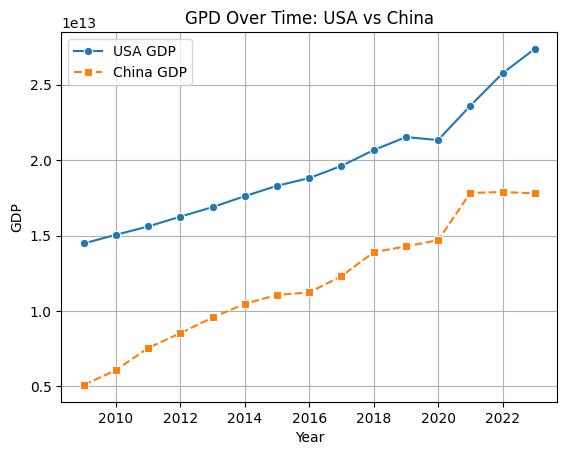

In [252]:
sns.lineplot(data= usa_gdp, x='Year', y='GDP', linestyle='-', marker='o', label='USA GDP')
sns.lineplot(data= china_gdp, x='Year', y='GDP', linestyle='--', marker='s', label='China GDP')

plt.title('GPD Over Time: USA vs China') 
plt.legend()
plt.grid(True)
plt.show()

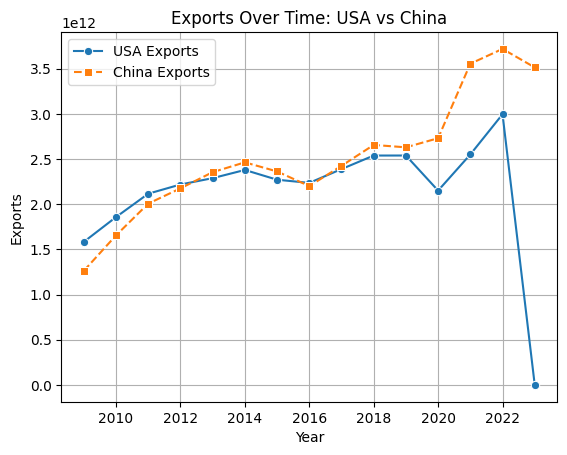

In [253]:
sns.lineplot(data= usa_gdp, x='Year', y='Exports', linestyle='-', marker='o', label='USA Exports')
sns.lineplot(data= china_gdp, x='Year', y='Exports', linestyle='--', marker='s', label='China Exports')

# Add plot details
plt.title('Exports Over Time: USA vs China')
plt.legend()
plt.grid(True)
plt.show()

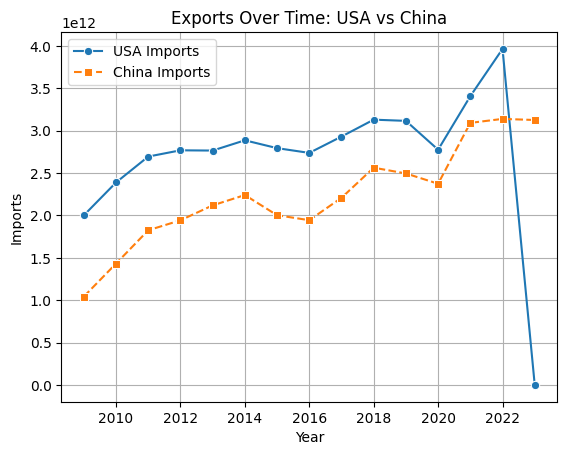

In [254]:
sns.lineplot(data= usa_gdp, x='Year', y='Imports', linestyle='-', marker='o', label='USA Imports')
sns.lineplot(data= china_gdp, x='Year', y='Imports', linestyle='--', marker='s', label='China Imports')

# Add plot details
plt.title('Exports Over Time: USA vs China')
plt.legend()
plt.grid(True)
plt.show()

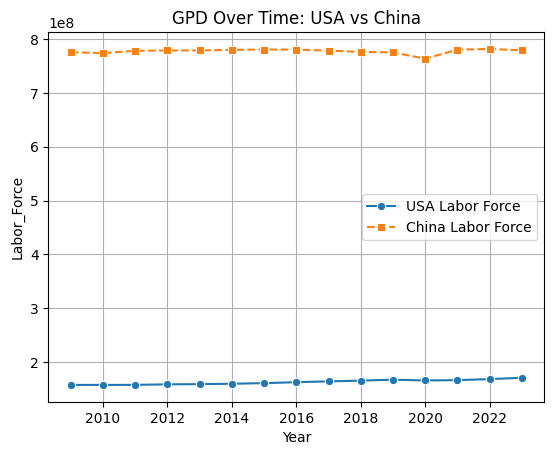

In [255]:
sns.lineplot(data= usa_gdp, x='Year', y='Labor_Force', linestyle='-', marker='o', label='USA Labor Force')
sns.lineplot(data= china_gdp, x='Year', y='Labor_Force', linestyle='--', marker='s', label='China Labor Force')

plt.title('GPD Over Time: USA vs China') 
plt.legend()
plt.grid(True)
plt.show()

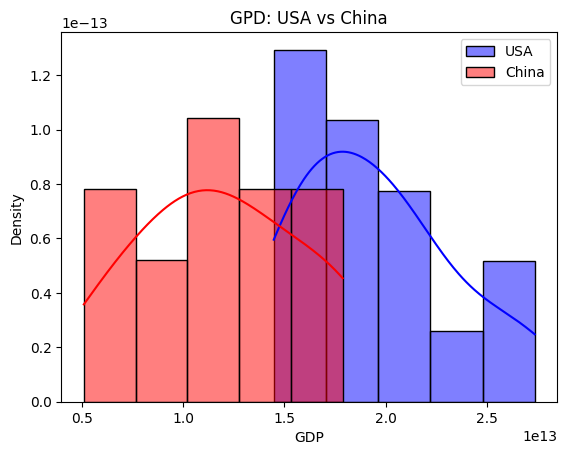

In [256]:
sns.histplot(data= usa_gdp, x='GDP', label='USA', kde=True, stat="density", alpha=0.5, color='blue')
sns.histplot(data= china_gdp, x='GDP', label='China', kde=True, stat="density", alpha=0.5, color='red')

plt.title('GPD: USA vs China') 
plt.legend()
plt.grid(False)
plt.show()

In [257]:
usa_and_chine_gdp = cleaned_df[(cleaned_df.Country_Name == 'United States') | (cleaned_df.Country_Name == 'China')]

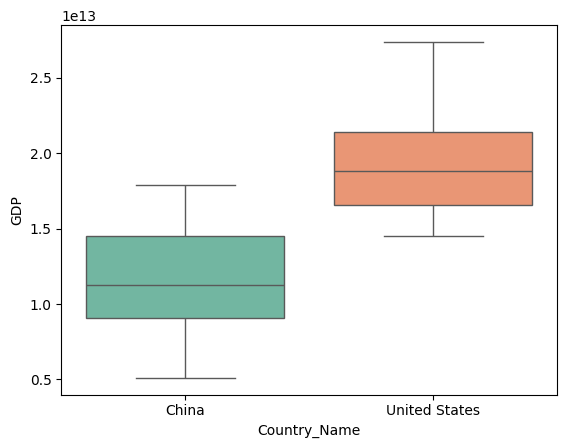

In [258]:
sns.boxplot(data=usa_and_chine_gdp, x='Country_Name', y='GDP', palette='Set2', hue='Country_Name')
plt.show()

In [259]:
cleaned_df.to_csv('cleaned_gdp_df.csv', index=False)
pd.read_csv('cleaned_gdp_df.csv').head()

,Country_Name,Year,Exports,GDP,GNI,Imports,Labor_Force,Population
0,Afghanistan,2009,0.0,1.241615e+10,1.237834e+10,0.0,6504675,27385307
1,Afghanistan,2010,0.0,1.585667e+10,1.588578e+10,0.0,6738587,28189672
2,Afghanistan,2011,0.0,1.780510e+10,1.778151e+10,0.0,7095658,29249157
3,Afghanistan,2012,0.0,1.990733e+10,1.996126e+10,0.0,7520865,30466479
4,Afghanistan,2013,0.0,2.014642e+10,2.020935e+10,0.0,7881567,31541209


In [260]:
cleaned_df.GDP = cleaned_df.GDP.astype('int')
cleaned_df.Exports = cleaned_df.Exports.astype('int')
cleaned_df.Imports = cleaned_df.Imports.astype('int')
cleaned_df.GNI = cleaned_df.GNI.astype('int')

cleaned_df.head()

/tmp/ipykernel_3226/2987174696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.GDP = cleaned_df.GDP.astype('int')
/tmp/ipykernel_3226/2987174696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.Exports = cleaned_df.Exports.astype('int')
/tmp/ipykernel_3226/2987174696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Labor_Force,Population
0,Afghanistan,2009,0,12416152732,12378340930,0,6504675,27385307
1,Afghanistan,2010,0,15856668555,15885775064,0,6738587,28189672
2,Afghanistan,2011,0,17805098206,17781511431,0,7095658,29249157
3,Afghanistan,2012,0,19907329777,19961261595,0,7520865,30466479
4,Afghanistan,2013,0,20146416757,20209353657,0,7881567,31541209


In [261]:
# gdp_group_per_country
cleaned_df.groupby('Country_Name').GDP.sum().sort_values().head(10)

Country_Name
British Virgin Islands                0
Gibraltar                             0
Korea, Dem. People's Rep.             0
Tuvalu                        675247143
Nauru                        1607346025
St. Martin (French part)     2850210005
Marshall Islands             3124922570
Kiribati                     3244196114
Palau                        3714152302
Sao Tome and Principe        5219199305
Name: GDP, dtype: int64

In [275]:
cleaned_df.groupby('Country_Name').Exports.sum().sort_values(ascending=True).head(20)

Country_Name
Kiribati                     351421409
Eritrea                      560365722
Nauru                        900913991
Tonga                       1045517468
Marshall Islands            1213690661
Micronesia, Fed. Sts.       1398962200
Palau                       1461153390
Comoros                     1759923230
Dominica                    2024703698
Burundi                     2577417227
Samoa                       3276453167
Gambia, The                 3501797459
Suriname                    4005480069
Guinea-Bissau               4189363448
Vanuatu                     4528113262
Central African Republic    4601404169
American Samoa              5821000000
Northern Mariana Islands    5915000000
Timor-Leste                 5930680800
Afghanistan                 6791196845
Name: Exports, dtype: int64

In [274]:
cleaned_df.groupby('Country_Name').Exports.sum().sort_values(ascending=False).head(20)

Country_Name
China                   37701911350741
United States           32106227000000
Germany                 26060522756180
United Kingdom          12817368194303
France                  12261759128742
Japan                   11894346809845
Netherlands             10855467005123
Korea, Rep.              9923913456732
Singapore                9428213964477
Italy                    9266208771996
Hong Kong SAR, China     9087396031666
Canada                   8283689633641
India                    7640641083815
Switzerland              7322708755783
Russian Federation       7261552685009
Spain                    6823091240538
Mexico                   6689466033445
Belgium                  6457733913253
Ireland                  6296724010997
Australia                4684991621377
Name: Exports, dtype: int64

In [277]:
guinea_gdp = cleaned_df[cleaned_df.Country_Name.isin(['Guinea', 'Senegal'])]

<Axes: xlabel='Year', ylabel='GDP'>

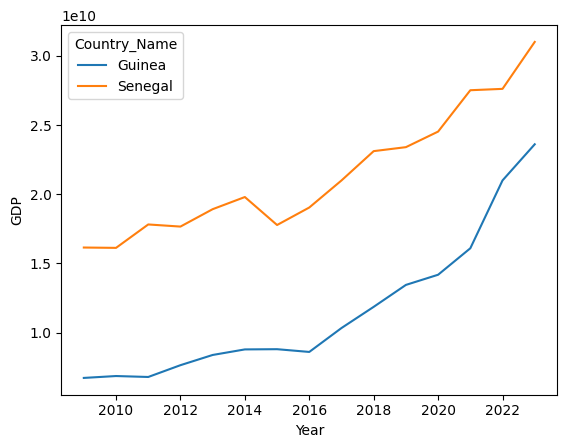

In [280]:
sns.lineplot(data=guinea_gdp, x='Year', y='GDP', hue='Country_Name')

<Axes: xlabel='Year', ylabel='Exports'>

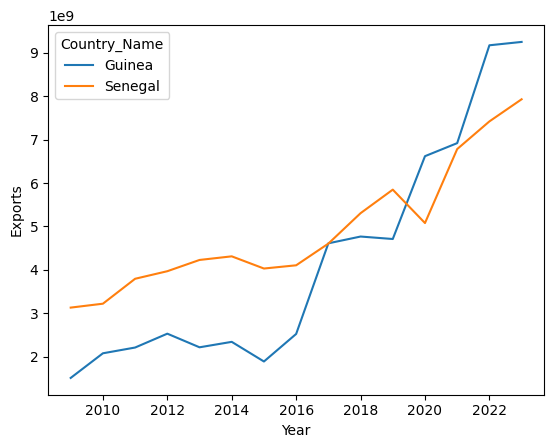

In [281]:
sns.lineplot(data=guinea_gdp, x='Year', y='Exports', hue='Country_Name')

<Axes: xlabel='Year', ylabel='Imports'>

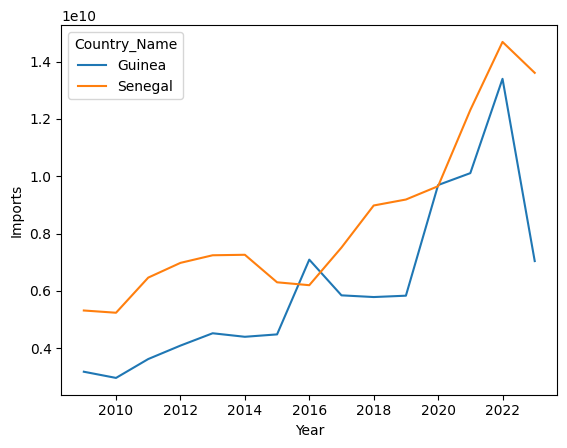

In [283]:
sns.lineplot(data=guinea_gdp, x='Year', y='Imports', hue='Country_Name')

<Axes: xlabel='Population'>

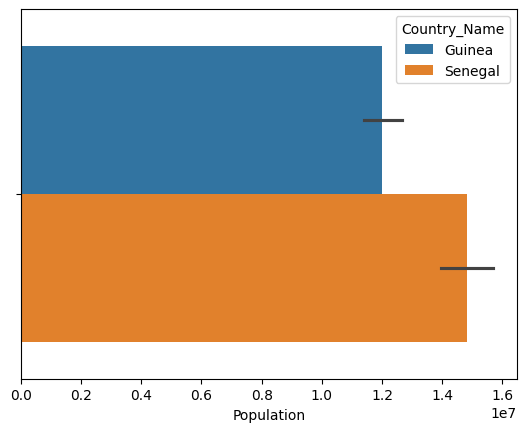

In [285]:
sns.barplot(data=guinea_gdp, x='Population', hue='Country_Name')

<Axes: xlabel='Exports', ylabel='GDP'>

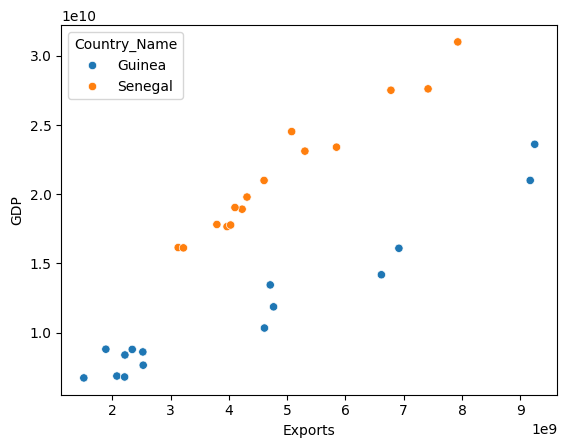

In [290]:
sns.scatterplot(data=guinea_gdp, x='Exports', y='GDP', 
                hue='Country_Name')

In [292]:
guinea_gdp.GDP.corr(guinea_gdp.Exports)

np.float64(0.7703907830437214)